In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

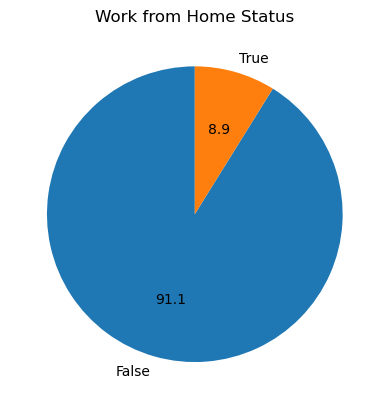

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

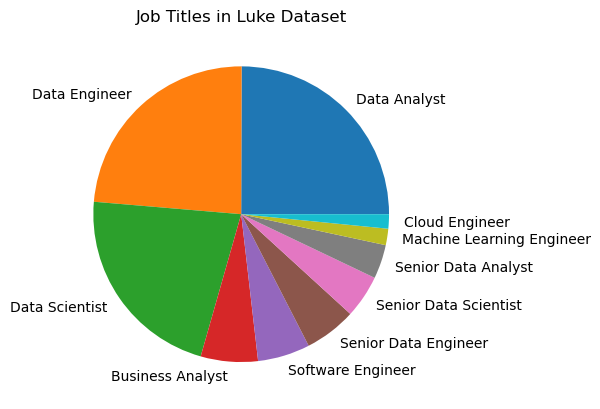

In [4]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles in Luke Dataset')
plt.ylabel('')
plt.show()

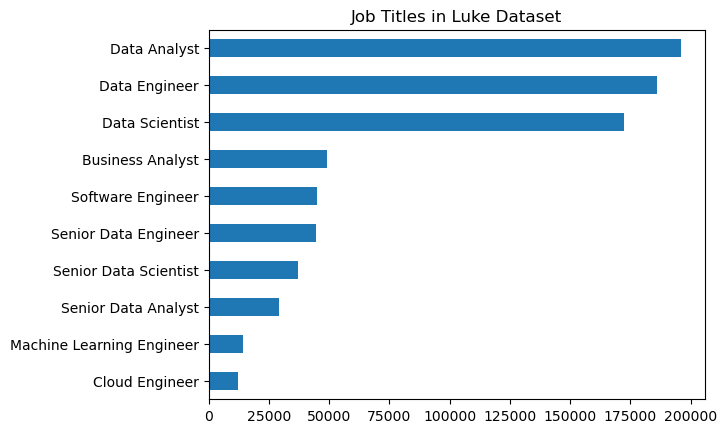

In [5]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title('Job Titles in Luke Dataset')
plt.gca().invert_yaxis()
plt.ylabel('')
plt.show()

In [6]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


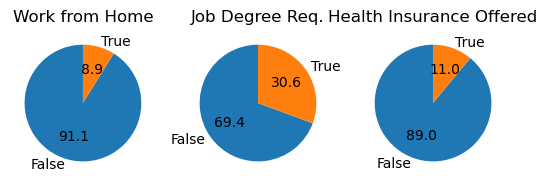

In [7]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f', labels=['False', 'True'])
    ax[i].set_title(title)



plt.show()

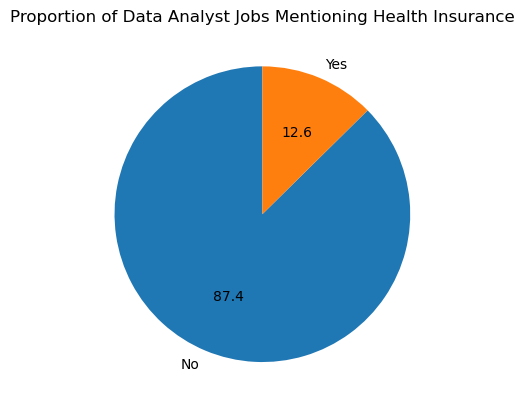

In [8]:
df_DA = df[df['job_title_short'] == 'Data Analyst']

df_DA['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f', labels=['No', 'Yes'])

plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')
plt.show()

In [47]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')]
#df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')]

df_ft_pt

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785702,Business Analyst,Aeronautical Analyst,"Gdańsk, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-26 06:24:52,False,False,Poland,None,NaN,NaN,NAVBLUE,None,None
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


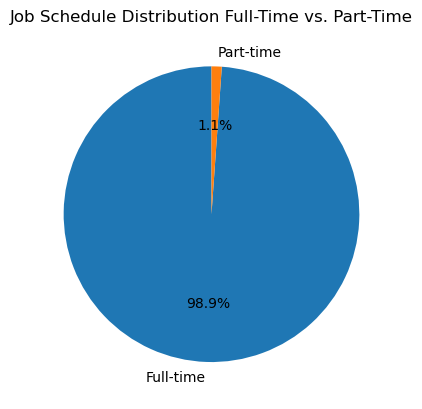

In [48]:
# No se que ocurrió, estabas colocando exactamente lo mismo pero no te daba y los datos quedaban vacios? :S a luke si le sirvió.

# Update: ERA Part-time con la t minuscula, no Time, por eso me quedaba en blanco porque no había ninguna info con T mayuscula en TIME.

df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()

plt.pie(job_schedule_counts, labels=job_schedule_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Schedule Distribution Full-Time vs. Part-Time')
plt.show()



In [50]:
df['job_no_degree_mention'].value_counts()

job_no_degree_mention
False    544965
True     240776
Name: count, dtype: int64

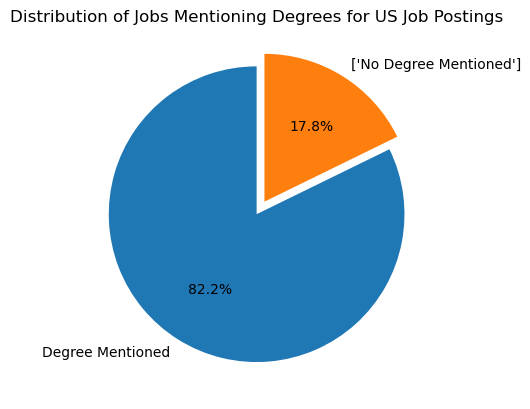

In [65]:
df_US = df[df['job_country'] == 'United States']
degree_counts = df_US['job_no_degree_mention'].value_counts()

plt.pie(degree_counts, labels=['Degree Mentioned', ['No Degree Mentioned']], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()

In [62]:
df_US['job_no_degree_mention'].value_counts()

job_no_degree_mention
False    6865
True      589
Name: count, dtype: int64

In [66]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
